# Tipos de Dados Avançados e Modelagem para Ciência Dados
## Entrega: 16 de maio


Desenvolva uma solução prática completa (end-to-end) que integre pelo menos dois tipos distintos de dados, visando resolver um problema específico na área de engenharia de dados.

Cada grupo deverá:

* Selecionar Dois Tipos de Dados: Escolher e trabalhar com pelo menos dois tipos diferentes de dados.
* Implementar com Docker: Configurar o ambiente de desenvolvimento utilizando Docker e Docker Compose para assegurar a reprodutibilidade.
* Criar um Pipeline de Dados: Desenvolver um pipeline que compreenda as etapas de coleta, processamento, análise e visualização dos dados.
* Aplicar Técnicas de Engenharia de Dados e Machine Learning: Integrar métodos adequados para manipulação e análise dos dados.
* Documentar o Processo: Criar um documento em Jupyter Notebook que descreva as decisões de design, os desafios enfrentados e as soluções implementadas.
* Apresentar os Resultados: Produzir um vídeo em formato mp4, com duração máxima de 15 minutos, e submeter o Jupyter Notebook da documentação, incluindo conclusões baseadas nos resultados obtidos, com destaque para insights e aprendizados.


Artefatos de Entrega: Um arquivo .mp4 e arquivos do Jupyter Notebook utilizados.

Pontuação | 8,0


NOSSA DATA FINAL: 9/MAIO


# <font color='blue'> UNISINOS
       
## Tipos de Dados Avançados e Modelagem para Ciência Dados

##### <font color='blue'> PROF. Marcelo Henrique Euzebio Batista

### Projeto Prático

##### <font color='blue'> Alunos: Denise Maliska Guimaraes, Fernando Cunha Krum, Marcia Natasha Brodt da Silva, Thais Helena Lachnit

## Avaliação de padrões dos usuários de Smartwatches

Neste projeto, vamos explorar os dados de usuários de smartwatches para monitoramento da atividade física diária e comparar com os dados relacionados da OMS para o ano de 2016 do país Estados Unidos da América. Usaremos a linguagem Python para manipular os dados e obter insights do padrão de comportamento destes usuários.

#### Objetivo: Avaliar se os usuários atenderam o tempo de atividade alta e moderada recomendado pela OMS.

O script inclui as seguintes etapas: 

1.  Escolha do dataset.
2.  Importação das bibliotecas que serão utilizadas.
3.  Tratamento dos dados.
4.  Avaliação dos dados.
5.  Geração do arquivo CSV de saída

Ao concluir este projeto será gerado um arquivo em csv com o tempo total que cada usuário exerceu as atividades e se eles atenderam ou não o tempo recomendado pela OMS. 

# 1. Escolha do dataset

Para a realização deste projeto, foi escolhido os dados relacionados no dataset: Fitness Track Daily Activity Dataset 2024. Este arquivo é no formato csv e contém os dados abaixo: 

Dados: 
* Identificação do usuário;
* Data do registro;
* Distância total percorrida;
* Distância do tracker
* Distância das atividades logadas;
* Distância de atividades: muito ativas, moderadas, pouco ativas e sedentárias;
* Tempo de atividades: muito ativas, moderadas, pouco ativas e sedentárias;
* distances for various activity levels (very active, moderately active, etc.), 
* Número de passos;
* Calorias queimadas.

Também foi realizado a integração à API Odata da OMS como fonte de comparação.

# 2. Importação das bibliotecas

Nesta etapa será realizada a importação das bibliotecas pandas, numpy, matplotlib, seaborn que serão utilizadas no desenvolvimento deste projeto.

In [35]:
import csv
import pandas as pd   
import matplotlib.pyplot as plt
import json

# 3. Tratamento dos dados

Os dados presentes no arquivo "Activity" serão carregados e preparados, com o objetivo de melhora da qualidade dos dados. Será avaliado se há valores ausentes, se os dados estão consistentes, se há erros e inconsistências.

In [36]:
#Leitura do arquivo "Activity" que está salvo em csv e exibição das primeiras linhas do arquivo
dataset = pd.read_csv('file:Activity.csv',sep=',')
dataset = pd.DataFrame(dataset)
dataset.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [37]:
# listar quantas respostas tem em cada coluna do dataset
dataset.count()

UserID                        940
Date                          940
Total_Distance                940
Tracker_Distance              940
Logged_Activities_Distance    940
Very_Active_Distance          940
Moderately_Active_Distance    940
Light_Active_Distance         940
Sedentary_Active_Distance     940
Very_Active_Minutes           940
Fairly_Active_Minutes         940
Lightly_Active_Minutes        940
Sedentary_Minutes             940
Steps                         940
Calories_Burned               940
dtype: int64

* Todas as colunas possuem o mesmo número de entradas, então por este parâmetro não há dados faltantes. 

In [38]:
# informações se encontra valor nulo
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

Conforme relação acima obtida a partir da função `.info()`, todas as colunas possuem o mesmo número de conteúdo não nulo, ou seja, todas possuem dados preenchidos. Também foi possível obter a informação do tipo de dado que está preenchido em cada coluna, sendo eles: 

* int64: Número inteiro;
* float64: Número reais, ponto flutante;
* object: objeto.

Os tipos de dados relacionados a cada coluna estão coerentes em serem númericos, demonstrando que não há inconsistências no preenchimento. O dado da data da atividade é do tipo objeto, pois o pandas não interpretou como data. É possível realizar um tratamento com os dados desta coluna para transformar em uma dado que esta biblioteca conseguirá interpretar da forma que pretendemos, se for necessário. 

* A partir da função `.describe()` podemos obter as informações de média, desvio padrão, valor mínimo, valor máximo e dos quartis de cada coluna. 

In [39]:
# Estatísticas básicas das variáveis do dataset
dataset.describe()

,UserID,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
std,2.424805e+09,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000
max,8.877689e+09,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000


In [40]:
# Contagem de n° de entradas de cada usuário
pd.value_counts(dataset['UserID'])

5553957443    31
2320127002    31
4702921684    31
1844505072    31
8583815059    31
8378563200    31
2026352035    31
4020332650    31
1624580081    31
2022484408    31
8877689391    31
6962181067    31
4558609924    31
1503960366    31
4445114986    31
2873212765    31
4319703577    31
8053475328    31
4388161847    31
1927972279    31
7086361926    31
3977333714    30
1644430081    30
5577150313    30
6290855005    29
8792009665    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: UserID, dtype: int64

A função `value.counts()` lista o número de entradas do dado selecionado, que neste caso foi selecionado a coluna de UserID. O objetivo de selecionar esta coluna foi observar o número de contribuições de cada usuário para os dados que estão sendo avaliados. 

Foram monitorados 33 usuários e destes 24 contribuiram com os dados por pelo menos 30 dias, 6 usuários contribuíram por pelo menos 20 dias e 3 usuários contribuíram com menos de 20 dias, sendo que o mais discrepante foi um único usuário que contribuiu por apenas 4 dias. 

Como o objetivo é realizar a análise do tempo de atividade que cada usuário realizou durante o período de 1 mês para comparar com as orientações da OMS, serão selecionados para analisar somente os usuários que forneceram dados por pelo menos 30 dias. 

Para realizar este filtro, iremos adicionar uma coluna aos dados com a informação de número de contribuições do usuário. 

In [41]:
dataset.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [42]:
# Adição da coluna ´Contribuicoes' ao dataset com o n° de contribuições de cada usuário
dataset['Contribuicoes'] = dataset.groupby(['UserID'])['UserID'].transform('count')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

A coluna `Contribuicoes`foi adicionada ao dataset com os valores do n° de entradas de cada usuário, como é possível verificar com a função `.info()` utilizada acima. 

Para utilizarmos somente os dados dos usuários que contribuiram com no mínimo 30 dias, iremos filtrar os dados.

In [43]:
# Remoção dos dados dos usuários com menos que 30 contribuições 
dataset_30 = dataset[(dataset['Contribuicoes'] >= 30)]
dataset_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 1 to 939
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      741 non-null    int64  
 1   Date                        741 non-null    object 
 2   Total_Distance              741 non-null    float64
 3   Tracker_Distance            741 non-null    float64
 4   Logged_Activities_Distance  741 non-null    float64
 5   Very_Active_Distance        741 non-null    float64
 6   Moderately_Active_Distance  741 non-null    float64
 7   Light_Active_Distance       741 non-null    float64
 8   Sedentary_Active_Distance   741 non-null    float64
 9   Very_Active_Minutes         741 non-null    int64  
 10  Fairly_Active_Minutes       741 non-null    int64  
 11  Lightly_Active_Minutes      741 non-null    int64  
 12  Sedentary_Minutes           741 non-null    int64  
 13  Steps                       741 non

Após o filtro realizado, observamos que o n° de entradas foi de reduzido de 940 para 741, pois estamos considerando somente os dados de usuários que contribuiram por no mínimo 30 dias. 

## 3.1 Buscando Json OMS com dados de 2016

In [44]:
# 1. Carregar o arquivo JSON com os dados da OMS
with open("atividade_fisica_oms_2016.json", encoding='utf-8') as f:
    data = json.load(f)

# 2. Acessar os dados tabulares que estão dentro da chave 'fact'
df = pd.DataFrame(data['fact'])

# 3. Extrair colunas úteis de dentro de 'dims'
df['COUNTRY'] = df['dims'].apply(lambda x: x.get('COUNTRY'))
df['YEAR'] = df['dims'].apply(lambda x: x.get('YEAR'))

# 4. Filtrar apenas os dados dos Estados Unidos no ano de 2016
df_usa_2016 = df[(df['COUNTRY'] == 'United States of America') & (df['YEAR'] == '2016')]

# 5. Visualizar o resultado
print("Colunas disponíveis:", df_usa_2016.columns.tolist())
print(df_usa_2016.head())


Colunas disponíveis: ['dims', 'Value', 'COUNTRY', 'YEAR']
                                                   dims             Value  \
1110  {'COUNTRY': 'United States of America', 'YEAR'...  40.0 [33.0-47.3]   
1111  {'COUNTRY': 'United States of America', 'YEAR'...  31.7 [25.8-38.3]   
1112  {'COUNTRY': 'United States of America', 'YEAR'...  48.0 [40.1-56.1]   
1113  {'COUNTRY': 'United States of America', 'YEAR'...  42.5 [35.4-49.9]   
1114  {'COUNTRY': 'United States of America', 'YEAR'...  33.7 [27.6-40.5]   

                       COUNTRY  YEAR  
1110  United States of America  2016  
1111  United States of America  2016  
1112  United States of America  2016  
1113  United States of America  2016  
1114  United States of America  2016  


# 4. Avaliação dos dados 

Os dados presentes no arquivo "Activity" foram selecionados para o `dataset_30` e podemos visualizar a sua distribuição e conseguir avaliar se este grupo de usuários atendeu as recomendações de tempo de atividade da OMS. 

Podemos utilizar o gráfico de pizza para visualizar a distribuição do tempo que os usuários passaram em cada estágio da atividade, sendo elas: muito ativas, moderadas, pouco ativas e sedentárias.

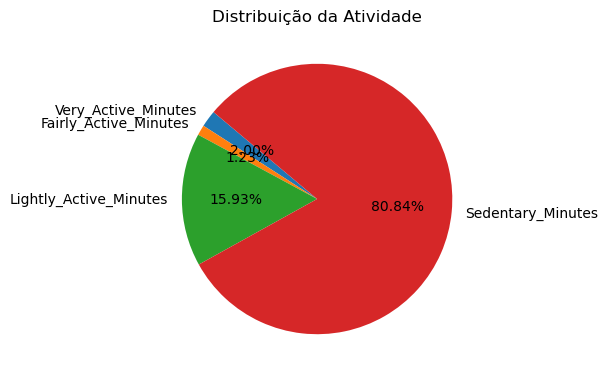

In [45]:
# Criação de um gráfico de pizza com a distribuição do tempo dos usuários em cada tipo de atividade
atividades = ['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes']
total_atividade = dataset_30 [atividades].sum()
plt.figure(figsize=(6, 6))
plt.pie(total_atividade, labels = total_atividade.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribuição da Atividade')
plt.tight_layout()
plt.show()

Conforme o gráfico acima, os usuários passaram 80,84% do tempo informado realizando atividades sendentárias, seguido por 15,93% do tempo realizando atividades leves. 

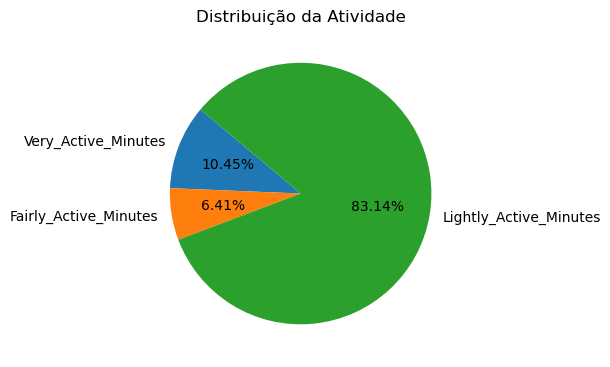

In [46]:
# Criação de um gráfico de pizza com a distribuição do tempo dos usuários em cada tipo de atividade, desconsiderando o tempo sedentário
atividades2 = ['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes']
total_atividade = dataset_30 [atividades2].sum()
plt.figure(figsize=(6, 6))
plt.pie(total_atividade, labels = total_atividade.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribuição da Atividade')
plt.tight_layout()
plt.show()

Ao desconsiderarmos o tempo não exercendo atividades (tempo sedentário), vemos que menos de 20% do tempo em que os usuários estavam executando atividades elas eram moderadamente e muito ativas, que são o tipo de atividade recomendada pela OMS para melhor qualidade de vida.

In [47]:
#Criação de nova dataset a partir dos dados totais dos usuários
atividades = ['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes']
dataset_30_totals = dataset_30.groupby(['UserID'],as_index=False)[atividades].sum() 
dataset_30_totals

,UserID,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes
0,1503960366,1200,594,6818,26293
1,1624580081,269,180,4758,38990
2,1644430081,287,641,5354,34856
3,1844505072,4,40,3579,37405
4,1927972279,41,24,1196,40840
5,2022484408,1125,600,7981,34490
6,2026352035,3,8,7956,21372
7,2320127002,42,80,6144,37823
8,2873212765,437,190,9548,34013
9,3977333714,567,1838,5243,21226


In [48]:
dataset_30_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   UserID                  24 non-null     int64
 1   Very_Active_Minutes     24 non-null     int64
 2   Fairly_Active_Minutes   24 non-null     int64
 3   Lightly_Active_Minutes  24 non-null     int64
 4   Sedentary_Minutes       24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


* Com o `dataset_30_totals` realizamos o agrupamento do tempo total que cada usuário passou realizando cada tipo de atividade durante os 30 dias em que foram coletados os dados. 

## Classificação

De acordo com a recomendação da OMS, o tempo de exercício por semana em ritmo alto e moderado é indicado abaixo:

* 150 a 300 minutos de atividade moderada/semana
* 75 a 150 minutos de atividade intensa/semana

<sub>
<a href="https://www.paho.org/pt/noticias/26-11-2020-oms-lanca-novas-diretrizes-sobre-atividade-fisica-e-comportamento-sedentario" target="_blank">
Fonte: Diretrizes da OMS sobre atividade física e comportamento sedentário
</a>
</sub>
<p>

Para avaliar se os usuários atingiram a quantidade mínima de exercício recomendada no mês em que os dados foram coletados, será comparado se foi atingido os valores:

* Fairly_Active_Minutes: Mínimo de 600 minutos
* Very_Active_Minutes: Mínimo de 300 minutos

In [49]:
dataset_30_totals ['Atende_recomendacao_OMS'] = (dataset_30_totals['Very_Active_Minutes'] >= 300) | (dataset_30_totals ['Fairly_Active_Minutes'] > 600)

dataset_30_totals

,UserID,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Atende_recomendacao_OMS
0,1503960366,1200,594,6818,26293,True
1,1624580081,269,180,4758,38990,False
2,1644430081,287,641,5354,34856,True
3,1844505072,4,40,3579,37405,False
4,1927972279,41,24,1196,40840,False
5,2022484408,1125,600,7981,34490,True
6,2026352035,3,8,7956,21372,False
7,2320127002,42,80,6144,37823,False
8,2873212765,437,190,9548,34013,True
9,3977333714,567,1838,5243,21226,True


* Dessa forma, além de identificar os usuários que atendem ou não às recomendações mínimas da OMS, é possível comparar o desempenho geral da amostra com dados oficiais da população americana no mesmo período. A seguir, apresentamos essa comparação utilizando dados da Organização Mundial da Saúde referentes ao ano de 2016:
 

In [50]:
percentual_ativos = dataset_30_totals['Atende_recomendacao_OMS'].mean() * 100
print(f"Percentual de usuários ativos no dataset: {percentual_ativos:.1f}%")


Percentual de usuários ativos no dataset: 66.7%


### Comparação com dados populacionais (OMS)

De acordo com os dados publicados pela Organização Mundial da Saúde (OMS) para os Estados Unidos em 2016, a prevalência de atividade física insuficiente entre adultos foi:

- **Ambos os sexos:** 40,0% [33,0 – 47,3]  
- **Homens:** 31,7% [25,8 – 38,3]  
- **Mulheres:** 48,0% [40,1 – 56,1]  

Ao comparar com os dados dos usuários do dataset, observamos que **66.7%**, ou seja, apresentam um nível de atividade superior à média da população geral americana naquele ano.

> Fonte: [OMS – Diretrizes sobre atividade física](https://www.paho.org/pt/noticias/26-11-2020-oms-lanca-novas-diretrizes-sobre-atividade-fisica-e-comportamento-sedentario)


# 5. Geração do arquivo CSV de saída

A seguir será gerado o arquivo cvs de saída com os dados:

* Identificação do usuário.
* Tempo de atividade total em minutos: muito ativas, moderadas, pouco ativas e sedentárias.
* Se ele atende a recomentação da OMS: True - atende; False - não atende.

In [51]:
# Geração arquivo csv
dataset_30_totals.to_csv('Activity_OMS.csv', sep=',', header=True, index=False, encoding='utf-8')